<a href="https://colab.research.google.com/github/maya034/TED-TALK-VIEWS-PREDICTION/blob/main/CH_Mayank_Kumar_TED_TALK_VIEWS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df=pd.read_csv("/content/drive/MyDrive/ML2/data_ted_talks.csv")

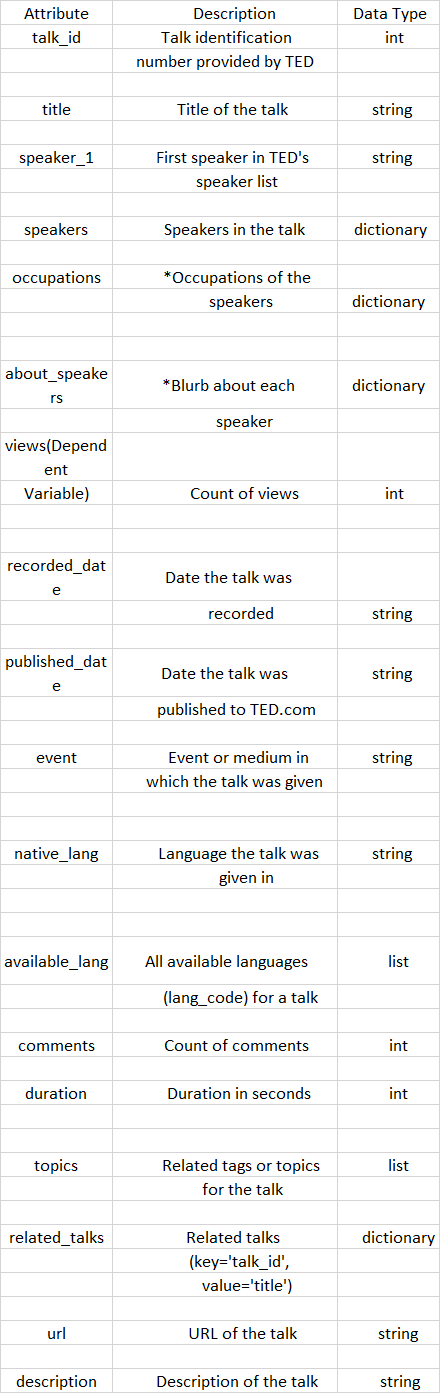

transcript       Full transcript of the talk     string


*The dictionary key maps to the speaker in ‘speakers’.

In [82]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


In [106]:
df['related_talks'][0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

In [105]:
type(df['comments'][0])

numpy.float64

In [83]:
df['talk_id'].nunique()

4005

In [84]:
df.shape

(4005, 19)

In [85]:
list(df.columns)

['talk_id',
 'title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript']

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [87]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

In [88]:
result = resumetable(df)

Dataset Shape: (4005, 19)


In [89]:
result

,Name,dtypes,Missing,Uniques,First Value,Second Value
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


In [90]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [91]:
df.isnull().values.any()

True

In [92]:
df['speaker_1'].isnull().value_counts()

False    4005
Name: speaker_1, dtype: int64

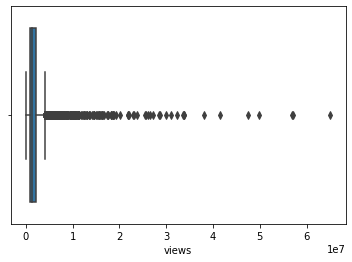

In [93]:
import seaborn as sns
sns.boxplot(df['views'])

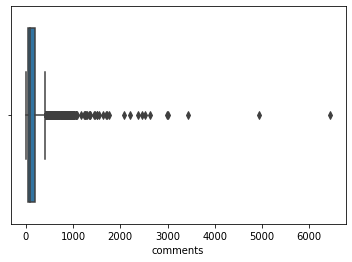

In [94]:
import seaborn as sns
sns.boxplot(df['comments'])

In [95]:
df['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

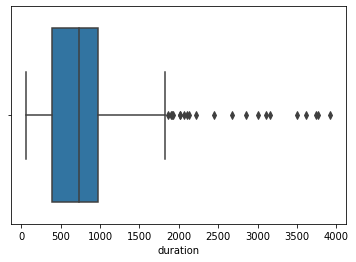

In [96]:
import seaborn as sns
sns.boxplot(df['duration'])

In [102]:
l=df['comments'].quantile(0.99)

In [104]:
df[df['comments']>l].shape

(34, 19)

In [97]:

Q1 = np.percentile(df['comments'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['comments'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['comments'], 75, interpolation = 'midpoint') 

In [98]:
IQR = Q3 - Q1 

In [99]:

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [100]:
outlier_comments =[]
for x in df['views']:
    if ((x> up_lim) or (x<low_lim)):
         outlier_comments.append(x)
print(' outlier in the dataset is', outlier_comments)

 outlier in the dataset is []


In [70]:

Q1 = np.percentile(df['views'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['views'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['views'], 75, interpolation = 'midpoint') 
  

In [71]:
IQR = Q3 - Q1 

In [72]:

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [73]:
outlier_views =[]
for x in df['views']:
    if ((x> up_lim) or (x<low_lim)):
         outlier_views.append(x)
print(' outlier in the dataset is', outlier_views)

 outlier in the dataset is [14501685, 65051954, 4636596, 4796806, 7049090, 11430399, 4032164, 8677098, 4140957, 18645468, 14372033, 4357286, 7386359, 14580918, 4091467, 6787797, 5955653, 5788514, 5857476, 4148915, 5300648, 5064090, 9418784, 9659339, 5082289, 5024994, 4144038, 15890639, 26553231, 12954031, 6928522, 6251793, 4109646, 6233365, 4744368, 13560900, 6545056, 18113717, 5764866, 5550176, 7152998, 5921682, 5340166, 4933059, 19256266, 4113823, 8792772, 11314168, 4416120, 6639270, 6811622, 30977634, 4782167, 4378764, 8039513, 4715715, 25654121, 8579496, 21858495, 7214463, 18762338, 4390444, 4102991, 25395829, 9527997, 6187754, 5664006, 6174823, 5777433, 6331825, 6152753, 8699436, 4888645, 6210513, 49730580, 5301036, 9316886, 6688030, 6466492, 5011527, 4141345, 5915370, 10143340, 47544833, 5262945, 4147612, 4719453, 5633692, 14608373, 4770370, 10947390, 4863704, 7780716, 5367231, 5709492, 7655066, 12481445, 4210667, 8666744, 8267202, 6221612, 5053890, 4416244, 28748868, 4326521, 75

In [74]:
len(outlier)

393

In [63]:
Q1 = np.percentile(df['duration'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['duration'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['duration'], 75, interpolation = 'midpoint') 

In [64]:
IQR = Q3 - Q1 

In [65]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [68]:
outlier_duration =[]
for x in df['duration']:
    if ((x> up_lim) or (x<low_lim)):
         outlier_duration.append(x)
print(' outlier in the dataset is', outlier_duration)

 outlier in the dataset is [2065, 1929, 2128, 2678, 1917, 2222, 1868, 1899, 2018, 2102, 2010, 3608, 2853, 2450, 3922, 3110, 3760, 3503, 3740, 3007, 3160]


In [69]:
len(outlier_duration)

21

In [ ]:
#Replace nan all_speakers by speaker_1
df['all_speakers'].fillna(str({0:[str(df['speaker_1'])]}),inplace=True,axis=0)
df['all_speakers']= df['all_speakers'].apply(lambda x: [val for val in ast.literal_eval(x).values() ] )